# Titanic: Machine Learning from Disaster

## Data Dictionary

_Variable	Definition_	     Key

__survival__ 	Survival 0 = No, 1 = Yes

__pclass__ 	Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

__sex__ 	Sex 	

__Age__ 	Age in years 	

__sibsp__ 	# of siblings / spouses aboard the Titanic 	

__parch__ 	# of parents / children aboard the Titanic 	

__ticket__ 	Ticket number

__fare__ 	Passenger fare 	

__cabin__ 	Cabin number 	

__embarked__ 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton




## Variable Notes

__pclass:__ A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

__age:__ Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp:__ The dataset defines family relations in this way...

__Sibling__ = brother, sister, stepbrother, stepsister

__Spouse__ = husband, wife (mistresses and fiancés were ignored)

__parch:__ The dataset defines family relations in this way...

__Parent__ = mother, father

__Child__ = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [50]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
#import xgboost as xgb

In [51]:
#Load train and test data

titanic_train = pd.read_csv('data/train.csv')


In [52]:
titanic_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [53]:
titanic_test = pd.read_csv('data/test.csv')
titanic_test.head()
#The Survived column is absent in test.csv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
titanic_train.shape

(891, 12)

In [55]:
titanic_train.describe()
#checking from count if there are any missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
#Checking if there are any columns with missing values
miss_columns = titanic_train.columns[titanic_train.isnull().any()]
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
#There are missing values in the columns Age, Cabin and Embarked
#Now let's look at the test set
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Visualization

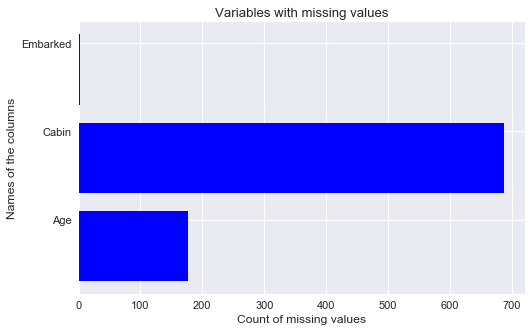

In [59]:
#The columns with null values in the test set are Age, Fare and Cabin.
# Now let's visualize missing values from the training set

labels = []
values = []

for col in miss_columns:
    labels.append(col)
    values.append(titanic_train[col].isnull().sum())
    
index = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,5))
rects = ax.barh(index, np.array(values), color='blue')
ax.set_yticks(index+((0.6)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Names of the columns")
ax.set_title("Variables with missing values");

    


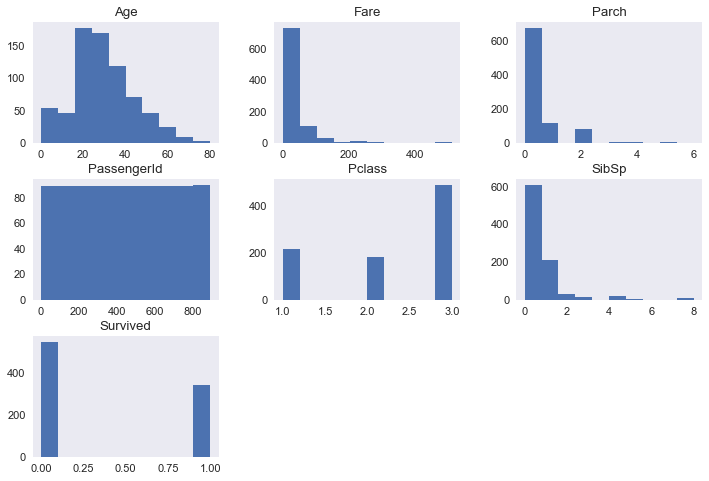

In [60]:
#More vizualization

titanic_train.hist(bins=10,figsize=(12,8),grid=False);

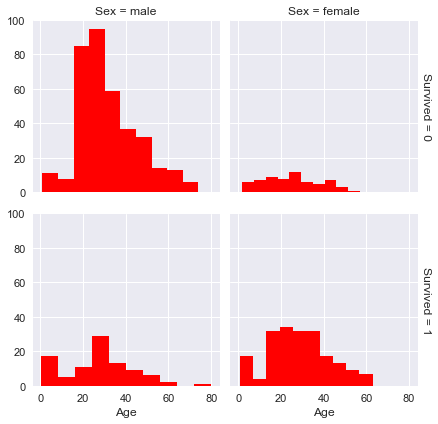

In [61]:
#We can notice that most of the features are measured on different scales, therefore we will need to scale them

gf = sns.FacetGrid(titanic_train, col="Sex", row="Survived", margin_titles=True)
gf.map(plt.hist, "Age",color="red");



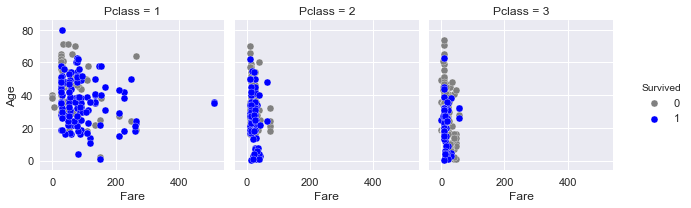

In [62]:
gf = sns.FacetGrid(titanic_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"blue", 0:"gray"})
gf = gf.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

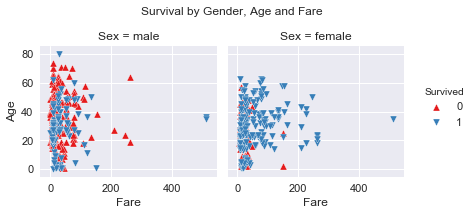

In [63]:
gf = sns.FacetGrid(titanic_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
gf.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
gf.fig.suptitle('Survival by Gender, Age and Fare');

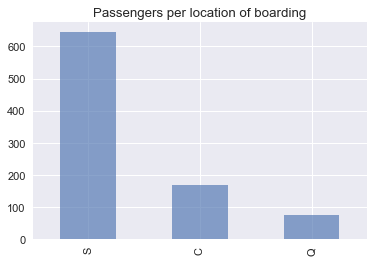

In [64]:
titanic_train['Embarked'].value_counts().plot(kind='bar', alpha=0.65)
plt.title("Passengers per location of boarding"); 

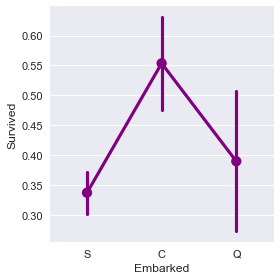

In [65]:
sns.factorplot(x = 'Embarked',y="Survived", data = titanic_train,color="purple");

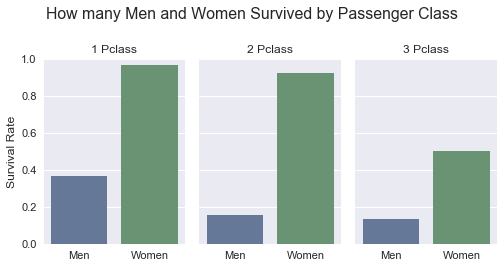

In [66]:
sns.set(font_scale=1.1)
gf = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic_train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(gf.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
gf.fig.suptitle('How many Men and Women Survived by Passenger Class');

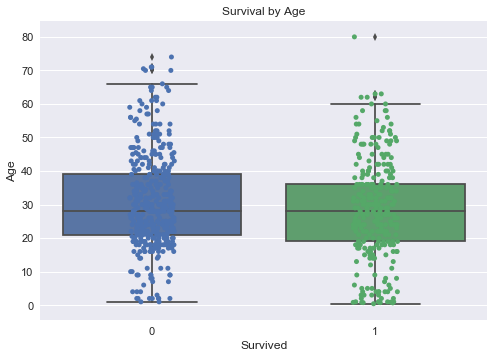

In [67]:
axis = sns.boxplot(x="Survived", y="Age", 
                data=titanic_train)
axis = sns.stripplot(x="Survived", y="Age",
                   data=titanic_train, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12);

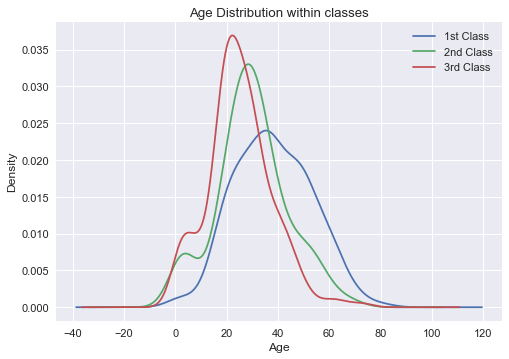

In [68]:
titanic_train['Age'][titanic_train['Pclass'] == 1].plot(kind='kde')    
titanic_train["Age"][titanic_train['Pclass'] == 2].plot(kind='kde')
titanic_train['Age'][titanic_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

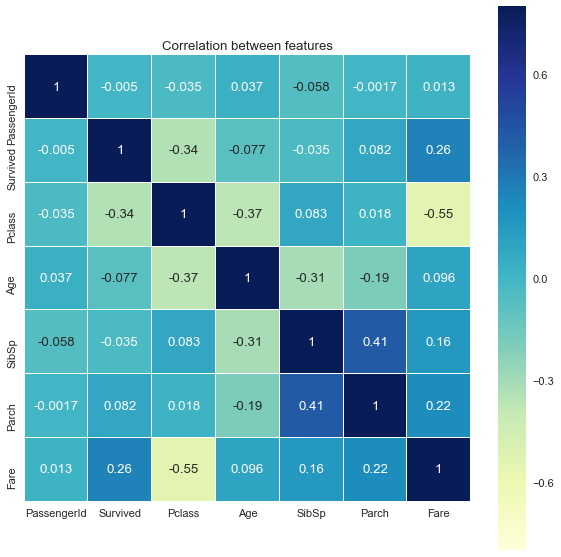

In [69]:
corr=titanic_train.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [70]:
#Correlation of the features with the variable Survived

titanic_train.corr()['Survived']


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

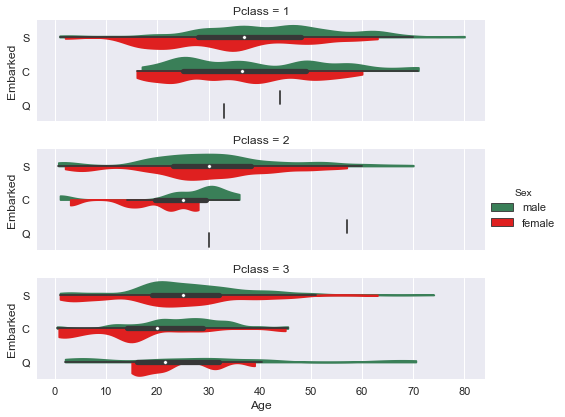

In [71]:
#The most important feature is Pclass, followed by Fare and Parch
gf = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic_train[titanic_train['Embarked'].notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"seagreen", 'female':"red"},
                    kind="violin", split=True, cut=0, bw=.2);

# Cleaning the Data

In [72]:
# Filling the null values of embarked columns with the mode

def fill_embarked(df):
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
# Filling the null values of cabin column with the N    
def fill_cabin(df):
    df['Cabin'].fillna('N', inplace= True)

#Filling the age column with the median grouped by sex
def fill_age(df):
    df.loc[df['Age'].isnull(), 'Age'] = df.groupby('Sex').Age.transform('median')
    
#Creating a new column Family members
def family_members(df):
    df['Family_members'] = df['Parch'] + df['SibSp'] + 1
    
def modify_sex_column(df):
    df['Sex'] = df['Sex'].apply(lambda sex:1 if sex == 'male' else 0)
    
def is_alone(df):
    df['Is_alone'] = 0
    df['Is_alone'].loc[df['Family_members'] < 2] = 1
    
def has_cabin(df):
    df['has_cabin'] = 1
    df['has_cabin'].loc[df['Cabin'] != 'N'] = 0
    
    
    

In [73]:
# Calling all the functions to clean the data
fill_embarked(titanic_train)
fill_cabin(titanic_train)
fill_age(titanic_train)
family_members(titanic_train)
modify_sex_column(titanic_train)
is_alone(titanic_train)
has_cabin(titanic_train)



In [74]:
#Checking again the training set
titanic_train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Family_members    0
Is_alone          0
has_cabin         0
dtype: int64

In [75]:
titanic_train.isnull().any()

PassengerId       False
Survived          False
Pclass            False
Name              False
Sex               False
Age               False
SibSp             False
Parch             False
Ticket            False
Fare              False
Cabin             False
Embarked          False
Family_members    False
Is_alone          False
has_cabin         False
dtype: bool

In [76]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Is_alone,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,1,1,1


In [77]:
name = titanic_train['Name']

def title_function(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else: 
        return 'Unknown'
titles = sorted(set([x for x in titanic_train['Name'].map(lambda x: title_function(x))]))

In [78]:
titles

['Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess']

In [79]:
def titles_replacing(df):
    title = df['Title']
    if title in ['Capt', "Col", 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if df['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
            

In [80]:
titanic_train['Title'] = titanic_train['Name'].map(lambda x: title_function(x))

In [81]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Is_alone,has_cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,1,1,1,Mr


In [82]:
titanic_train['Title'] = titanic_train.apply(titles_replacing, axis=1)

In [83]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Is_alone,has_cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,2,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,1,1,1,Mr


In [84]:
titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [85]:
titanic_train.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Family_members      int64
Is_alone            int64
has_cabin           int64
Title              object
dtype: object

In [86]:
titanic_train.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis = 1, inplace = True)

In [87]:
#titanic_train.head()
col = titanic_train.columns
col

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Family_members', 'Is_alone', 'has_cabin', 'Title'],
      dtype='object')

In [88]:

le = LabelEncoder()

def label_encoding(df):
    df['Embarked'] = le.fit_transform(df['Embarked'])
    df['Title'] = le.fit_transform(df['Title'])
    
    
# A new variable 
label_train = titanic_train

In [89]:
#Let's check the data in the test set

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
#Cleaning the data with the cleaning funtions

fill_embarked(titanic_test)
fill_cabin(titanic_test)
fill_age(titanic_test)
family_members(titanic_test)
modify_sex_column(titanic_test)
is_alone(titanic_test)
has_cabin(titanic_test)

In [92]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members,Is_alone,has_cabin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,N,Q,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,N,S,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,N,Q,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,N,S,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,N,S,3,0,1


In [94]:
name = titanic_test['Name']

titles = sorted(set([x for x in titanic_test['Name'].map(lambda x: title_function(x))]))
titanic_test['Title'] = titanic_test['Name'].map(lambda x: title_function(x))
titanic_test['Title'] = titanic_test.apply(titles_replacing, axis=1)

In [95]:
label_encoding(label_train)
label_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members,Is_alone,has_cabin,Title
0,1,0,3,1,22.0,7.2500,2,2,0,1,2
1,2,1,1,0,38.0,71.2833,0,2,0,0,3
2,3,1,3,0,26.0,7.9250,2,1,1,1,1
3,4,1,1,0,35.0,53.1000,2,2,0,0,3
4,5,0,3,1,35.0,8.0500,2,1,1,1,2


In [99]:
titanic_test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis = 1, inplace = True)
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)


In [100]:
titanic_test.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
Family_members    0
Is_alone          0
has_cabin         0
Title             0
dtype: int64

In [101]:
label_test = titanic_test
label_encoding(label_test)
label_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_members,Is_alone,has_cabin,Title
0,892,3,1,34.5,7.8292,1,1,1,1,3
1,893,3,0,47.0,7.0000,2,2,0,1,4
2,894,2,1,62.0,9.6875,1,1,1,1,3
3,895,3,1,27.0,8.6625,2,1,1,1,3
4,896,3,0,22.0,12.2875,2,3,0,1,4


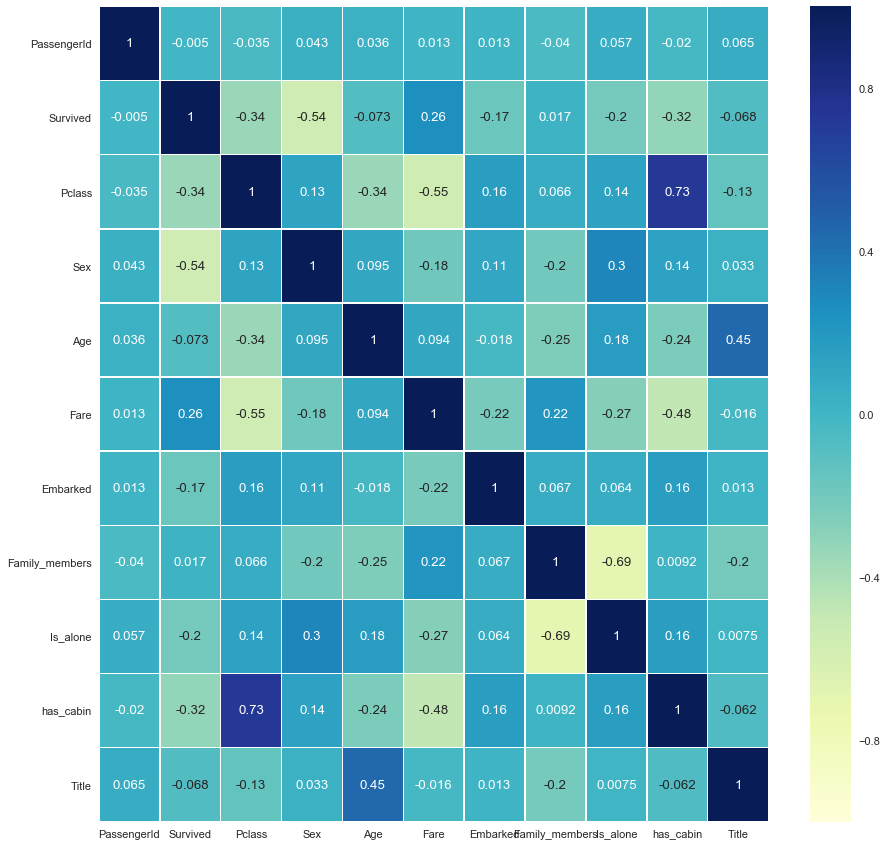

In [103]:
# Correlation matrix with the modified labels

plt.figure(figsize = (15,15))
sns.heatmap(label_train.corr(), linewidths = .5, annot= True, cmap="YlGnBu");

# Predictions

In [104]:
X = label_train.drop('Survived', axis=1)
y = label_train['Survived']

X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(X, y, test_size=0.2)


In [105]:
# Logistic Regression

lr = LogisticRegression(C=1)
print(lr.fit(X_label_train, y_label_train))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [109]:
print('Accuracy for the Logistic Model on training set:', accuracy_score(y_label_train, lr.predict(X_label_train)))
print('Accuracy for the Logistic Model on testing set:', accuracy_score(y_label_test, lr.predict(X_label_test)))

Accuracy for the Logistic Model on training set: 0.797752808989
Accuracy for the Logistic Model on testing set: 0.815642458101


In [112]:
score_lr = cross_val_score(lr, X.values, y.values, cv=5)
print('Cross Validation score: ',score_lr)
print('Cross Validation mean score: ', score_lr.mean())

Cross Validation score:  [ 0.78212291  0.79888268  0.78089888  0.79213483  0.82485876]
Cross Validation mean score:  0.795779610304


In [113]:
#Decission Tree Classifier Model

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 11)
print(tree.fit(X_label_train, y_label_train))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [114]:
print("Accuracy of Decision Tree Model on train:",accuracy_score(y_label_train, tree.predict(X_label_train)))
print("Accuracy of Decision Tree Model on test:",accuracy_score(y_label_test, tree.predict(X_label_test)))

Accuracy of Decision Tree Model on train: 0.945224719101
Accuracy of Decision Tree Model on test: 0.787709497207


In [115]:
score_tree = cross_val_score(tree, X.values, y.values, cv=5)
print("Cross Validation on Tree Classifier Model score : ", score_tree)
print("Cross Validation Mean score : ", score_tree.mean())

Cross Validation on Tree Classifier Model score :  [ 0.63687151  0.78212291  0.80337079  0.78089888  0.84180791]
Cross Validation Mean score :  0.769014397187


In [116]:
#Random Forest Classifier Model

forest = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', max_depth = 5, 
                                min_samples_split = 3)
print(forest.fit(X_label_train, y_label_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [117]:
print("Accuracy of Random Forest Model on train set:",accuracy_score(y_label_train, forest.predict(X_label_train)))
print("Accuracy of Random Forest Model on test set:",accuracy_score(y_label_test, forest.predict(X_label_test)))

Accuracy of Random Forest Model on train set: 0.859550561798
Accuracy of Random Forest Model on test set: 0.832402234637


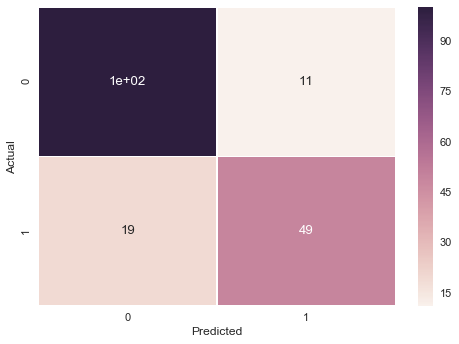

In [119]:
# Using confusion matrix to validate the model

conf = confusion_matrix(y_label_test, forest.predict(X_label_test))
sns.heatmap(conf, linewidths = 0.5, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');


In [120]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 29, weights ='distance')
print(knn.fit(X_label_train, y_label_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='distance')


In [121]:
print("Accuracy of KNN Model on train:",accuracy_score(y_label_train, knn.predict(X_label_train)))
print("Accuracy of KNN Model on test:",accuracy_score(y_label_test, knn.predict(X_label_test)))

Accuracy of KNN Model on train: 1.0
Accuracy of KNN Model on test: 0.675977653631


In [122]:
score_knn = cross_val_score(knn, X.values, y.values, cv=5)
print("Cross Validation score : " , score_knn)
print("Cross Validation Mean score : ", score_knn.mean())

Cross Validation score :  [ 0.62011173  0.46927374  0.61797753  0.66853933  0.64971751]
Cross Validation Mean score :  0.605123968583


In [123]:
knn2 = KNeighborsClassifier(n_neighbors = 15, weights ='distance')
print(knn2.fit(X_label_train, y_label_train))
print("Accuracy of KNN Model on train set:",accuracy_score(y_label_train, knn2.predict(X_label_train)))
print("Accuracy of KNN Model on test set:",accuracy_score(y_label_test, knn2.predict(X_label_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')
Accuracy of KNN Model on train: 1.0
Accuracy of KNN Model on test: 0.675977653631


In [124]:
# SVM Model
svc = SVC(C=1, kernel = 'sigmoid')
print(svc.fit(X_label_train, y_label_train))

print("Accuracy of SVM Model on train set:",accuracy_score(y_label_train, svc.predict(X_label_train)))
print("Accuracy of SVM Model on test set:",accuracy_score(y_label_test, svc.predict(X_label_test)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy of SVM Model on train set: 0.615168539326
Accuracy of SVM Model on test set: 0.620111731844


In [125]:
score_svc = cross_val_score(svc, X.values, y.values, cv=5)
print("Cross Validation score : ", score_svc)
print("Cross Validation Mean score :",score_svc.mean())

Cross Validation score :  [ 0.61452514  0.61452514  0.61797753  0.61797753  0.61581921]
Cross Validation Mean score : 0.61616490891


In [126]:
#Adaboost Model
ada = AdaBoostClassifier(learning_rate = 0.1)
print(ada.fit(X_label_train, y_label_train))

print("Accuracy of SVM Model on train set:",accuracy_score(y_label_train, ada.predict(X_label_train)))
print("Accuracy of SVM Model on test set:",accuracy_score(y_label_test, ada.predict(X_label_test)))

score_ada = cross_val_score(ada, X.values, y.values, cv=5)
print("Cross Validation score : ", score_ada)
print("Cross Validation Mean score : ", score_ada.mean())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)
Accuracy of SVM Model on train set: 0.824438202247
Accuracy of SVM Model on test set: 0.821229050279
Cross Validation score :  [ 0.61452514  0.82122905  0.80898876  0.79775281  0.81920904]
Cross Validation Mean score :  0.772340960505


In [127]:
# Gradient Boosting Algorithm
gbc = GradientBoostingClassifier()
print(gbc.fit(X_label_train, y_label_train))

print("Accuracy of GBC Model on train:",accuracy_score(y_label_train, gbc.predict(X_label_train)))
print("Accuracy of GBC Model on test:",accuracy_score(y_label_test, gbc.predict(X_label_test)))

score_gbc = cross_val_score(gbc, X.values, y.values, cv=5)
print("Cross Validation score : ", score_gbc)
print("Cross Validation Mean score : ", score_gbc.mean())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Accuracy of GBC Model on train: 0.914325842697
Accuracy of GBC Model on test: 0.854748603352
Cross Validation score :  [ 0.63687151  0.81005587  0.81460674  0.8258427   0.84745763]
Cross Validation Mean score :  0.786966887925


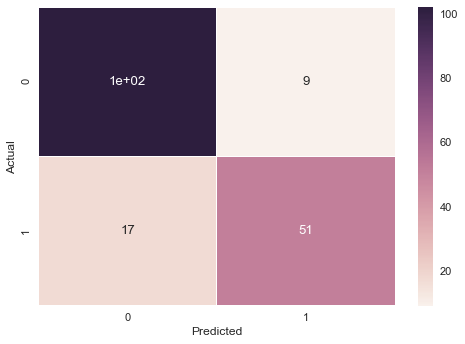

In [132]:
conf = confusion_matrix(y_label_test, gbc.predict(X_label_test))
sns.heatmap(conf, linewidths = 0.4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [134]:
#Predicting the test_label model on Gradient Boosting Model

gbc.predict(label_test)
gbc_pred= pd.DataFrame({'PassengerId' : np.arange(892,1310), 'Survived': gbc.predict(label_test)})
gbc_pred.to_csv('Titanic_submission_GBC.csv', index=False)
